# import dataset and libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("wine_data.csv")
df

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [12]:
df.columns

Index(['1', '14.23', '1.71', '2.43', '15.6', '127', '2.8', '3.06', '.28',
       '2.29', '5.64', '1.04', '3.92', '1065'],
      dtype='object')

In [19]:
df = pd.read_csv("wine_data.csv", header=None, usecols=[0, 1, 2])
df.sample(4)

,0,1,2
125,2,12.07,2.16
141,3,13.36,2.56
77,2,11.84,2.89
111,2,12.52,2.43


In [20]:
df.columns = ['Class Label', 'Alcohol', 'Malic Acid']
df.sample(5)

,Class Label,Alcohol,Malic Acid
121,2,11.56,2.05
35,1,13.48,1.81
106,2,12.25,1.73
150,3,13.50,3.12
6,1,14.39,1.87


In [34]:
df.shape

(178, 3)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Class Label  178 non-null    int64  
 1   Alcohol      178 non-null    float64
 2   Malic Acid   178 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.3 KB


In [32]:
df.describe()

,Class Label,Alcohol,Malic Acid
count,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348
std,0.775035,0.811827,1.117146
min,1.000000,11.030000,0.740000
25%,1.000000,12.362500,1.602500
50%,2.000000,13.050000,1.865000
75%,3.000000,13.677500,3.082500
max,3.000000,14.830000,5.800000


# EDA

<Axes: xlabel='Alcohol', ylabel='Density'>

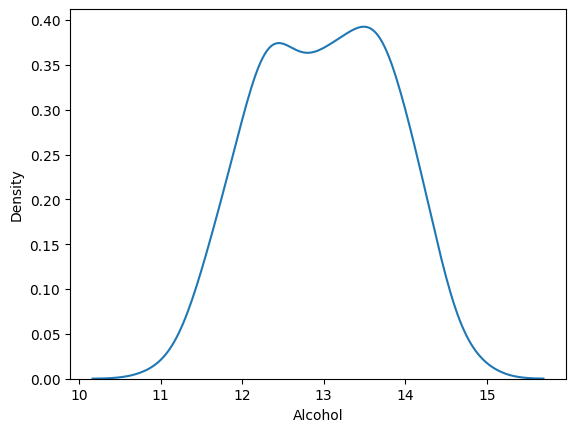

In [21]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic Acid', ylabel='Density'>

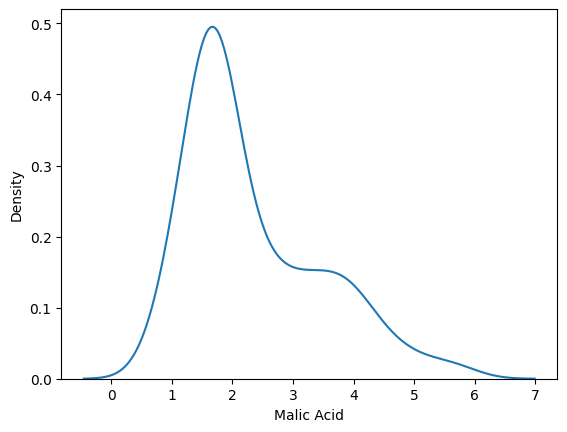

In [22]:
sns.kdeplot(df['Malic Acid'])

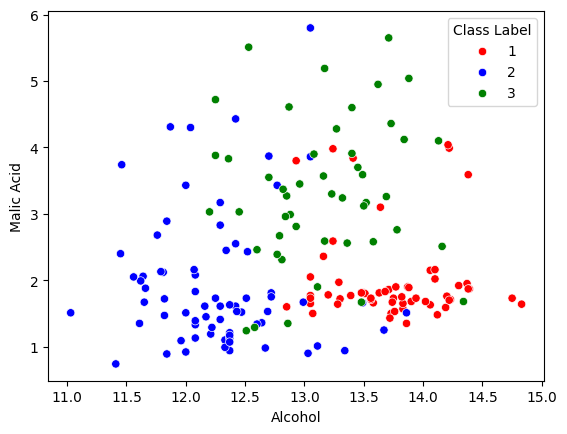

In [ ]:
color_dict = {1: 'red', 2:'blue', 3:'green'}
sns.scatterplot(df,
                x=df['Alcohol'],
                y=df['Malic Acid'],
                hue=df['Class Label'],
                palette=color_dict,
                )
plt.show()

# train test split

In [24]:
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop('Class Label', axis=1)
y = df['Class Label']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [29]:
X_train.shape

(124, 2)

In [30]:
X_test.shape

(54, 2)

# Min Max Scalar

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [36]:
# fit the scaler to train set 
scaler.fit(X_train)

MinMaxScaler()

In [37]:
# Transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
# Make the scaled data into data frame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [38]:
# describe 
np.round(X_train.describe(), 1)

,Alcohol,Malic Acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [ ]:
# X_train_scaled.describe() 
# scaled are now in numpy array so we can't apply the describe()

# Before After comparison  

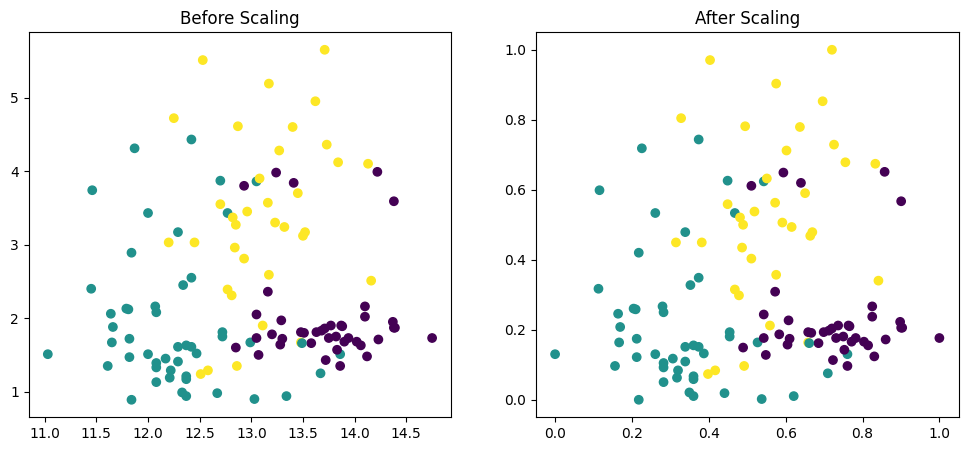

In [53]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("Before Scaling")
ax1.scatter(X_train['Alcohol'], X_train['Malic Acid'], c=y_train)

ax2.set_title("After Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic Acid'], c=y_train)
plt.show()

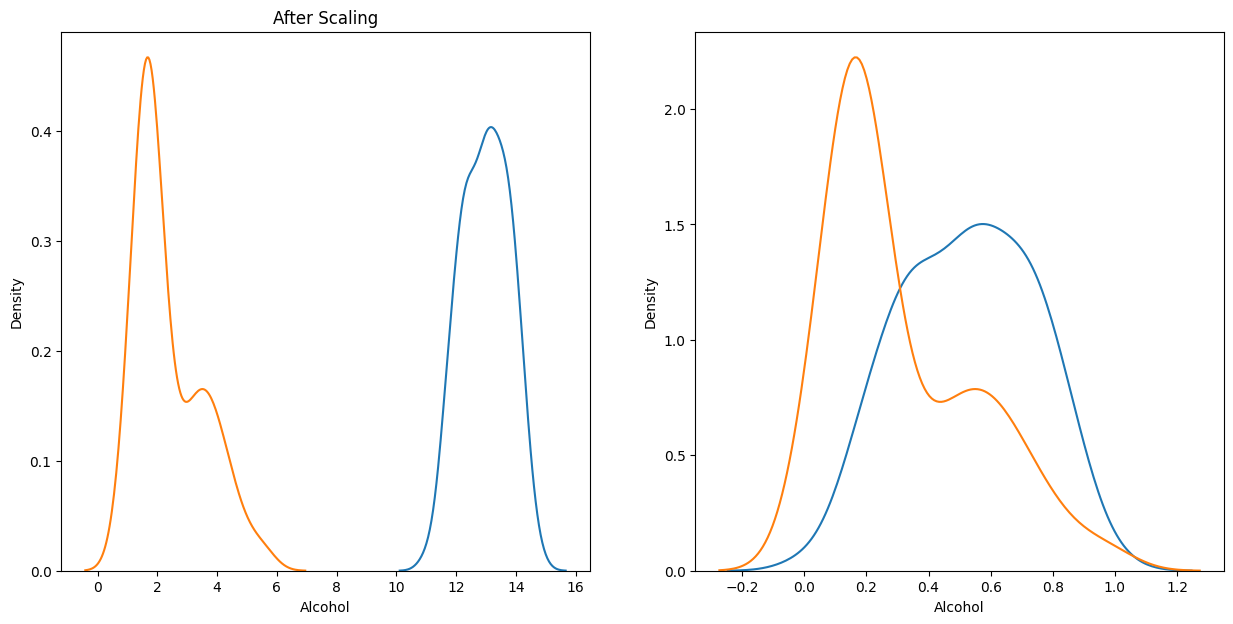

In [56]:
# kde comparison 

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 7))

ax1.set_title("After Scaling")
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic Acid'], ax=ax1)

ax1.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic Acid'], ax=ax2)

plt.show()

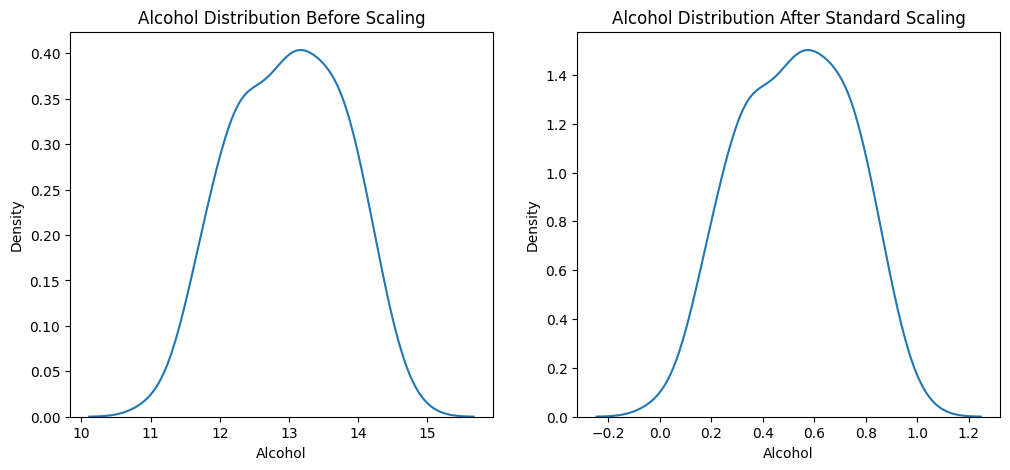

In [57]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

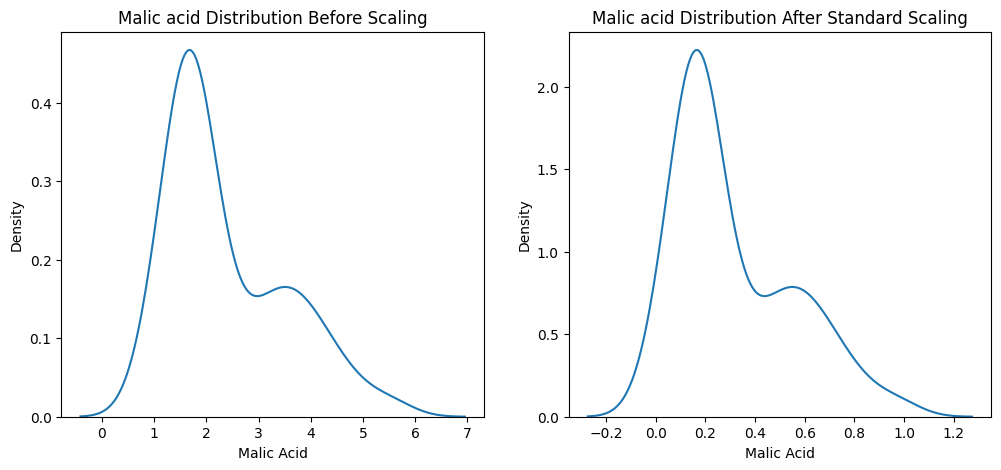

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic Acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic Acid'], ax=ax2)

plt.show()